--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB

--- Dataset Description ---
          order_id     quantity
count  4622.000000  4622.000000
mean    927.254868     1.075725
std     528.890796     0.410186
min       1.000000     1.000000
25%     477.250000     1.000000
50%     926.000000     1.000000
75%    1393.000000     1.000000
max    1834.000000    15.000000

--- Column Names ---
['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']

--- Most Ordered Item ---
item_name
Chicken Bowl    761
Name: quantity,

C:\Users\nicol\AppData\Local\Temp\ipykernel_35780\1482832949.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  seaborn.barplot(x=top_5_items.values, y=top_5_items.index, palette='viridis')


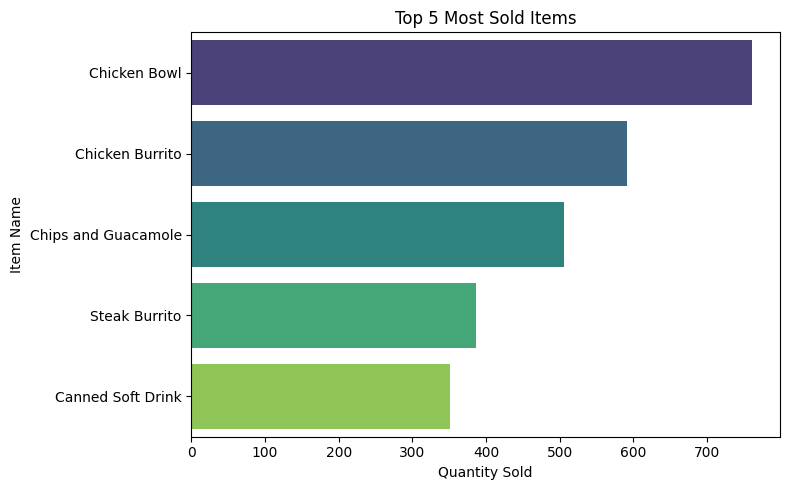

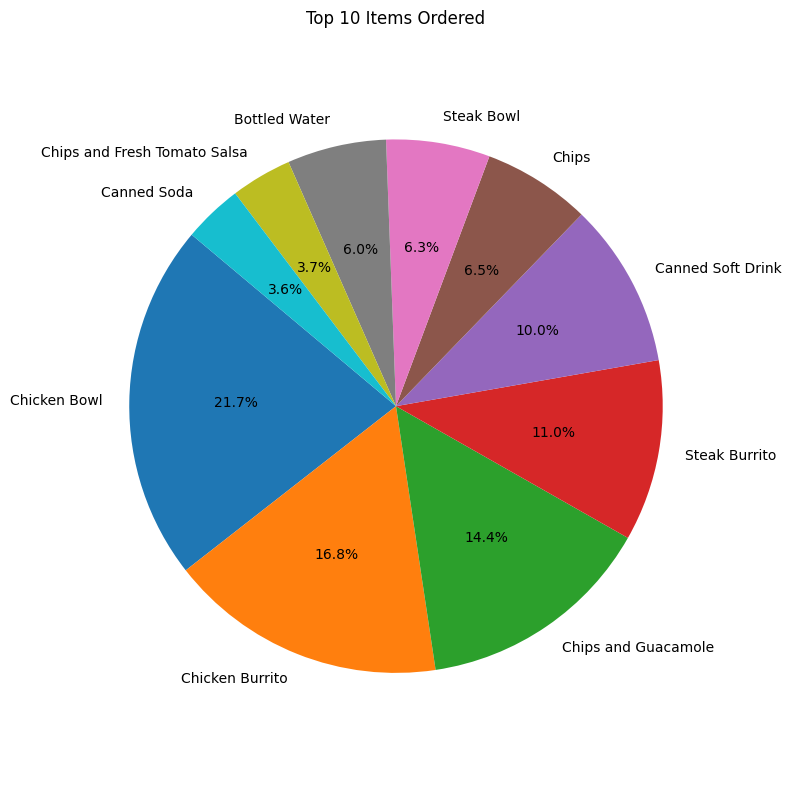

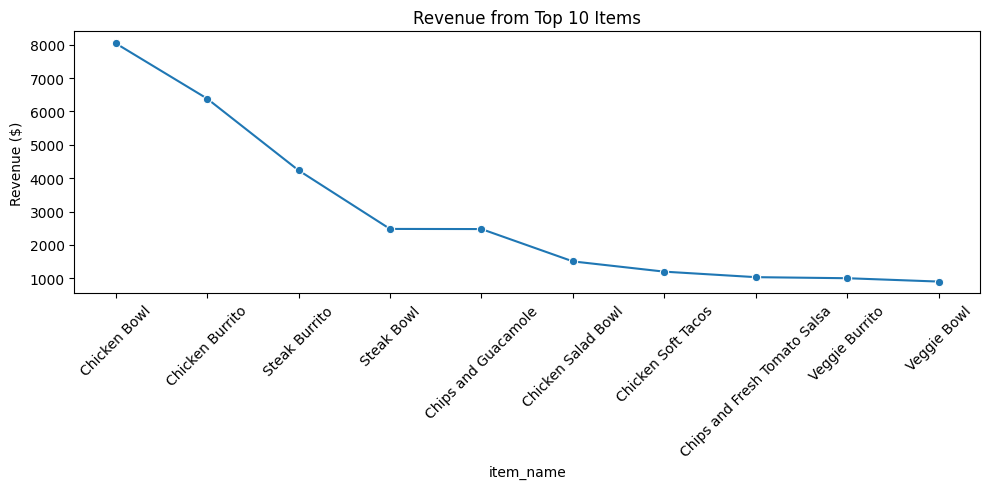


--- Highest Average Price Item ---
item_name
Bowl    14.8
Name: item_price, dtype: float64


In [18]:
import pandas
import seaborn
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

chipotle_data = pandas.read_csv(url, sep = '\t')

chipotle_data.head()	

# Info about the dataset
print("--- Dataset Info ---")
chipotle_data.info()

# Summary statistics
print("\n--- Dataset Description ---")
print(chipotle_data.describe())

print("\n--- Column Names ---")
print(chipotle_data.columns.tolist())

# 3. Most ordered item
most_ordered = chipotle_data.groupby('item_name')['quantity'].sum().sort_values(ascending=False)
print("\n--- Most Ordered Item ---")
print(most_ordered.head(1))

# 4. Total Revenue
chipotle_data['item_price'] = chipotle_data['item_price'].str.replace('$', '', regex=False).astype(float)
chipotle_data['total_price'] = chipotle_data['quantity'] * chipotle_data['item_price']
total_revenue = chipotle_data['total_price'].sum()
print(f"\n--- Total Revenue ---\n${total_revenue:.2f}")

# 5. Total Number of Orders
num_orders = chipotle_data['order_id'].nunique()
print(f"\n--- Total Orders ---\n{num_orders}")

# 6. Items that cost more than $10
items_over_10 = chipotle_data[chipotle_data['item_price'] > 10]
print(f"\n--- Items with Price > $10 ---\n{len(items_over_10)} rows")

# 7. Unique Items
unique_items = chipotle_data['item_name'].unique()
print("\n--- Unique Item Names ---")
print(unique_items)
print(f"\nTotal Unique Items: {len(unique_items)}")

# 8. Bar Graph of Top 5 Items Sold
top_5_items = chipotle_data.groupby('item_name')['quantity'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(8, 5))
seaborn.barplot(x=top_5_items.values, y=top_5_items.index, palette='viridis')
plt.title("Top 5 Most Sold Items")
plt.xlabel("Quantity Sold")
plt.ylabel("Item Name")
plt.tight_layout()
plt.show()

# 9. Pie Chart of Top 10 Items Ordered
top_10_items = chipotle_data.groupby('item_name')['quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 8))
plt.pie(top_10_items.values, labels=top_10_items.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 10 Items Ordered")
plt.axis('equal')
plt.tight_layout()
plt.show()

# 10. Line Graph of Revenue from Top 10 Items
revenue_by_item = chipotle_data.groupby('item_name')['total_price'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
seaborn.lineplot(x=revenue_by_item.index, y=revenue_by_item.values, marker='o')
plt.title("Revenue from Top 10 Items")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 11. Custom Question: Highest Average Price Item
avg_price_per_item = chipotle_data.groupby('item_name')['item_price'].mean().sort_values(ascending=False)
print("\n--- Highest Average Price Item ---")
print(avg_price_per_item.head(1))



